In [50]:
import os
import glob
import librosa
import matplotlib.pyplot as plt
import numpy as np

#PARAMETERS
EXAMPLE_ID = 1 # from 1 to 9 
CURRENT_DATASET = "blizzard"

In [51]:

BETH = os.path.join("beethoven")
BLIZ = os.path.join("blizzard")
LJSP = os.path.join("LJSpeech")

EX_BETH = os.path.join(BETH, f"BeethovenPianoSonataNo.{EXAMPLE_ID}", f"BeethovenSonata{EXAMPLE_ID}.ogg")
EX_BLIZ = os.path.join(BLIZ, "SH1", "A", "submission_directory", "INT", "wav", f"INT_000{EXAMPLE_ID}.wav")
EX_LJSP = os.path.join(LJSP, "wavs", f"LJ001-000{EXAMPLE_ID}.wav")

data_path, example_path = {
    "beethoven": (BETH, EX_BETH),
    "blizzard": (BLIZ,EX_BLIZ),
    "ljspeech": (LJSP, EX_LJSP)
}[CURRENT_DATASET]

In [52]:
how_many_audio_files = 0 

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.ogg') or file.endswith('.wav'):
            how_many_audio_files += 1

how_many_audio_files

36198

In [53]:
def analyze_audio(file_path):
    y, sr = librosa.load(file_path)
    length_audio = len(y)/sr
    if length_audio>6.0:
        y = y[:sr*6]

    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    stft = np.abs(librosa.stft(y))

    plt.figure(figsize=(12, 12))

    plt.subplot(5, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')

    plt.subplot(5, 1, 2)
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')

    plt.subplot(5, 1, 3)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')

    plt.subplot(5, 1, 4)
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')

    plt.subplot(5, 1, 5)
    plt.text(0.1, 0.5, f'Długość nagrania: {length_audio} sekundy\n'
                       f'Sample rate: {sr} Hz\n'
                       f'Tempo: {tempo} BPM\n'
                       f'Spectral Centroid Mean: {np.mean(spectral_centroid):.2f}',
             horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.savefig(f"visualizations\\info_{CURRENT_DATASET}_{EXAMPLE_ID}.png")

    print(f'Długość nagrania: {length_audio} sekundy')
    print(f'Sample rate: {sr} Hz')
    print(f'Tempo: {tempo} BPM')
    print(f'Spectral Centroid Mean: {np.mean(spectral_centroid)}')


In [54]:
def analyze_dataset(folder_path):
    durations = []
    sample_rates = []
    tempos = []
    spectral_centroid_means = []

    for (root,dirs,files) in os.walk(folder_path, topdown=True):
        for file_name in files: 
            if  file_name[:2] != "._" and (file_name[-4:] == ".wav" or  file_name[-4:] == ".ogg"):
                file_path = os.path.join(root, file_name)
                print(file_name[:1])
                print(file_path)
                
                y, sr = librosa.load(file_path, sr=None) 
                
                durations.append(len(y)/sr)
                sample_rates.append(sr)
                tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
                tempos.append(tempo)
                spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
                spectral_centroid_means.append(np.mean(spectral_centroid))

    print(f"Średnia długość utworu: {np.mean(durations):.2f} sekundy")
    print(f"Średni sample rate: {np.mean(sample_rates):.2f} Hz")
    print(f"Średnie tempo: {np.mean(tempos):.2f} BPM")
    print(f"Średnia wartość spectral centroid: {np.mean(spectral_centroid_means):.2f}")

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(durations, bins=20, color='blue', edgecolor='black')
    plt.title('Histogram Długości Utworów')
    plt.xlabel('Długość (s)')
    plt.ylabel('Liczba Utworów')

    plt.subplot(2, 2, 2)
    plt.hist(sample_rates, bins=20, color='green', edgecolor='black')
    plt.title('Histogram Sample Rate')
    plt.xlabel('Sample Rate (Hz)')
    plt.ylabel('Liczba Utworów')

    plt.subplot(2, 2, 3)
    plt.hist(tempos, bins=20, color='orange', edgecolor='black')
    plt.title('Histogram Tempa')
    plt.xlabel('Tempo (BPM)')
    plt.ylabel('Liczba Utworów')

    plt.subplot(2, 2, 4)
    plt.hist(spectral_centroid_means, bins=20, color='red', edgecolor='black')
    plt.title('Histogram Średniej Spectral Centroid')
    plt.xlabel('Średni Spectral Centroid')
    plt.ylabel('Liczba Utworów')

    plt.tight_layout()
    plt.savefig(f"visualizations\\dataset_{CURRENT_DATASET}.png")


Długość nagrania: 2.212517006802721 sekundy
Sample rate: 22050 Hz
Tempo: 92.28515625 BPM
Spectral Centroid Mean: 1886.8608310680763


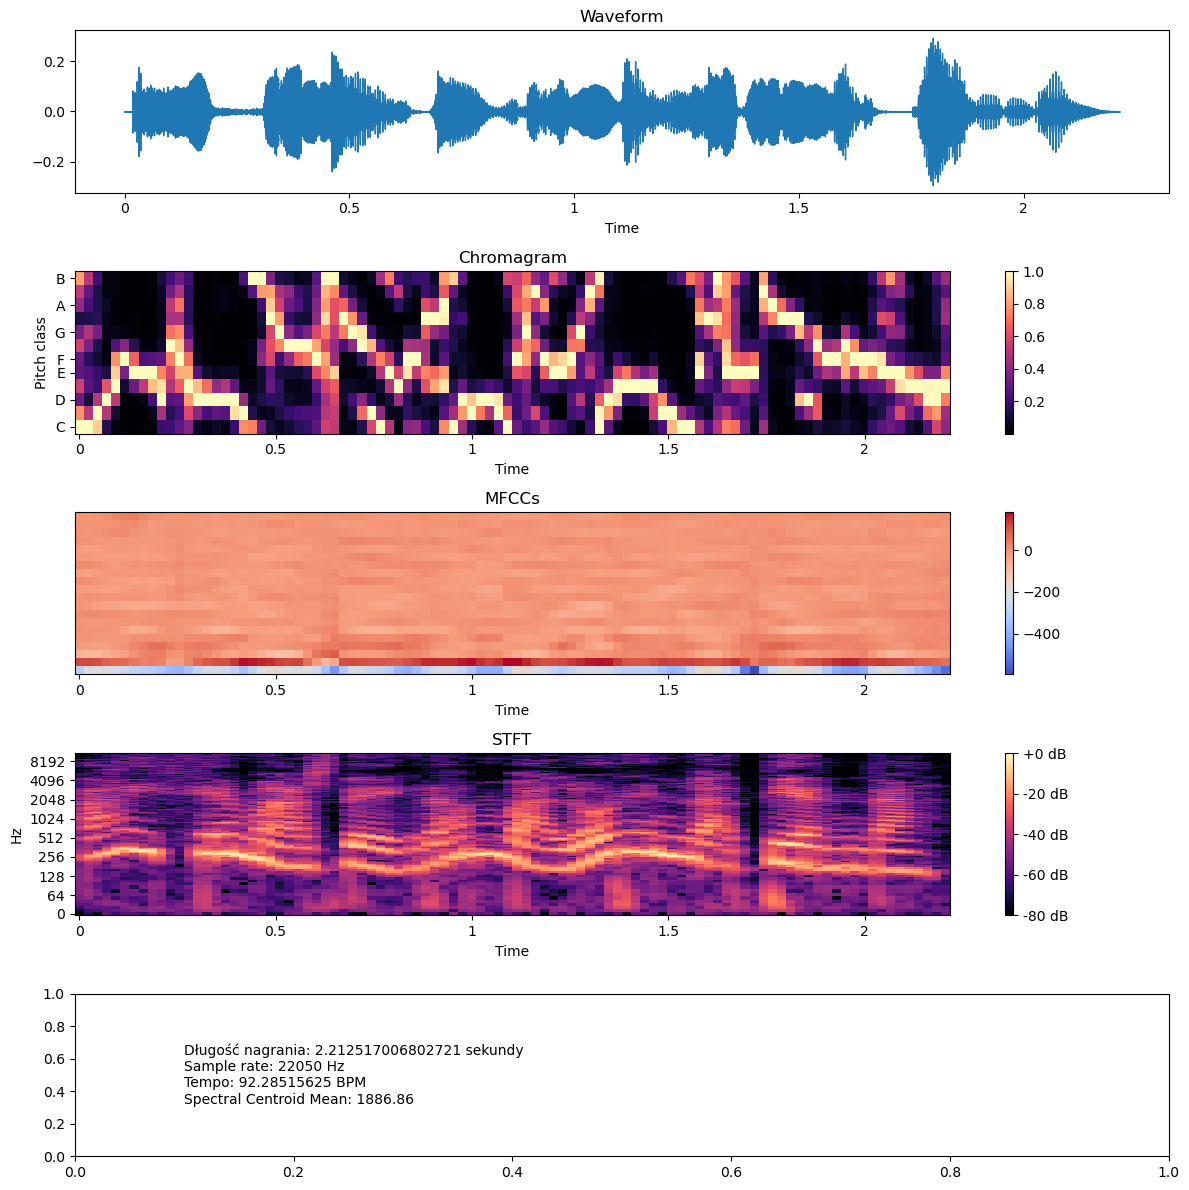

In [55]:
analyze_audio(example_path)

I
blizzard\SH1\A\submission_directory\INT\wav\INT_0001.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0002.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0003.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0004.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0005.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0006.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0007.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0008.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0009.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0010.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0011.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0012.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0013.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0014.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0015.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0016.wav
I
blizzard\SH1\A\submission_directory\INT\wav\INT_0017.w

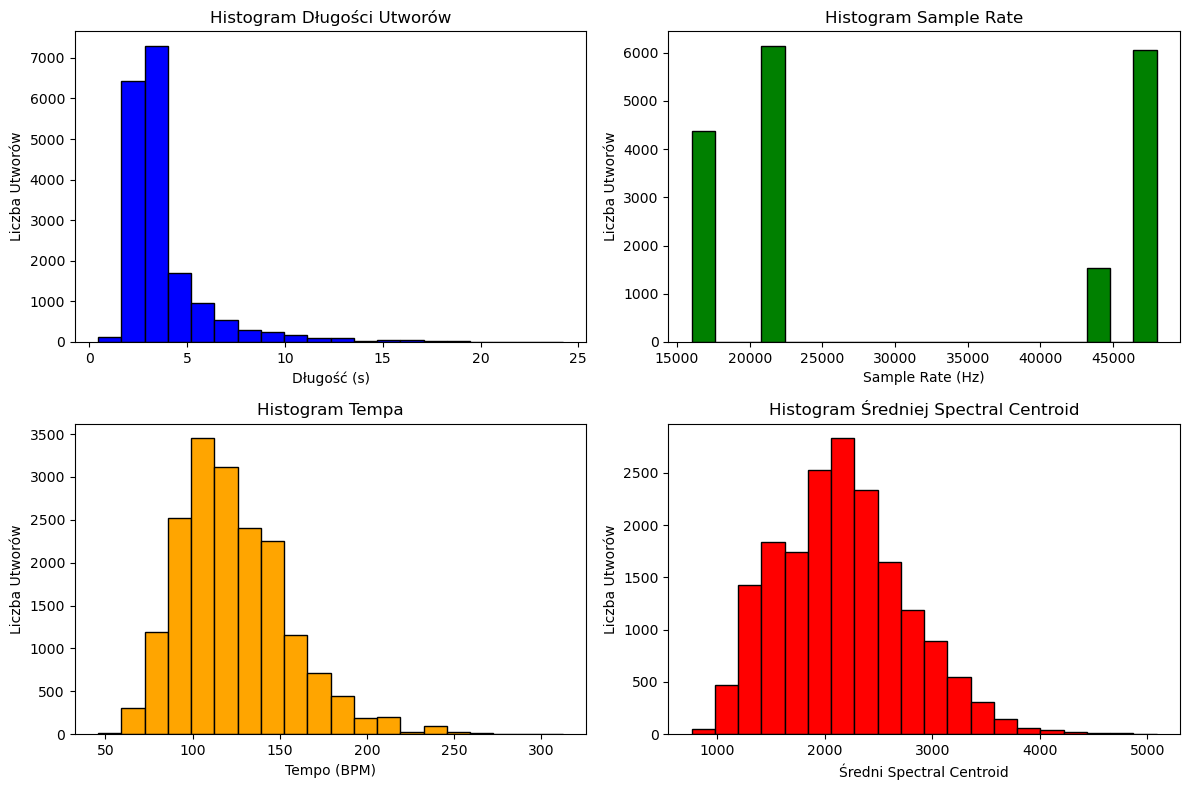

In [56]:
analyze_dataset(data_path)